# Environment setup

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import squarify

## Load the data and parse dates

In [2]:
df_Nov = pd.read_csv("2019-Nov.csv", parse_dates = ["event_time"])
df_Oct = pd.read_csv("2019-Oct.csv", parse_dates = ["event_time"])

# Preliminary analysis of the data
Before we dive into the actual homework, let's take a brief look at the data. This could be beneficial to learn something useful, to get an overview of the data we're about to work with.

## Dataframes head

In [1]:
# Checking the first 5 rows of the October dataframe
df_Oct.head()

NameError: name 'df_Oct' is not defined

In [2]:
# Checking the first 5 rows of the November dataframe
df_Nov.head()

NameError: name 'df_Nov' is not defined

## General statistics
Let's review our dataframe using the methods `info()` and `describe()`.

In [5]:
df_Oct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4102283 entries, 0 to 4102282
Data columns (total 9 columns):
 #   Column         Dtype              
---  ------         -----              
 0   event_time     datetime64[ns, UTC]
 1   event_type     object             
 2   product_id     int64              
 3   category_id    int64              
 4   category_code  object             
 5   brand          object             
 6   price          float64            
 7   user_id        int64              
 8   user_session   object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(4)
memory usage: 281.7+ MB


In [6]:
df_Nov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4635837 entries, 0 to 4635836
Data columns (total 9 columns):
 #   Column         Dtype              
---  ------         -----              
 0   event_time     datetime64[ns, UTC]
 1   event_type     object             
 2   product_id     int64              
 3   category_id    int64              
 4   category_code  object             
 5   brand          object             
 6   price          float64            
 7   user_id        int64              
 8   user_session   object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(4)
memory usage: 318.3+ MB


In [7]:
df_Oct.describe()

,product_id,category_id,price,user_id
count,4.102283e+06,4.102283e+06,4.102283e+06,4.102283e+06
mean,5.468464e+06,1.545652e+18,8.534920e+00,5.013416e+08
std,1.321863e+06,1.563666e+17,1.913315e+01,8.171257e+07
min,3.752000e+03,1.487580e+18,-7.937000e+01,4.103071e+06
25%,5.723489e+06,1.487580e+18,2.140000e+00,4.692921e+08
50%,5.809115e+06,1.487580e+18,4.110000e+00,5.389695e+08
75%,5.850322e+06,1.487580e+18,7.140000e+00,5.575029e+08
max,5.900470e+06,2.195085e+18,3.076000e+02,5.662808e+08


In [8]:
df_Nov.describe()

,product_id,category_id,price,user_id
count,4.635837e+06,4.635837e+06,4.635837e+06,4.635837e+06
mean,5.481406e+06,1.550049e+18,8.120701e+00,5.068070e+08
std,1.305582e+06,1.642371e+17,1.879197e+01,8.504375e+07
min,3.752000e+03,1.487580e+18,-7.937000e+01,1.120748e+06
25%,5.723529e+06,1.487580e+18,1.940000e+00,4.698573e+08
50%,5.810145e+06,1.487580e+18,3.970000e+00,5.421750e+08
75%,5.856186e+06,1.487580e+18,6.350000e+00,5.680491e+08
max,5.909246e+06,2.195085e+18,3.277800e+02,5.799699e+08


## Extract more information

In [9]:
# Extracting the number of each unique user_id
number_customers_oct = df_Oct['user_id'].nunique()
number_customers_nov = df_Nov['user_id'].nunique()

In [10]:
# Extracting the dataframe of successful purchases only
only_purchases_oct = df_Oct[df_Oct.event_type == "purchase"]
only_purchases_nov = df_Nov[df_Nov.event_type == "purchase"]

# Questions

## [RQ1]
A marketing funnel describes your *customer’s journey* with your e-commerce. It may involve different stages, beginning when someone learns about your business, when he/she visits your website for the first time, to the purchasing stage, marketing funnels map routes to conversion and beyond. Suppose your funnel involves just three simple steps: 1) view, 2) cart, 3) purchase. Which is the rate of complete funnels?
   - What’s the operation users repeat more on average within a session? Produce a plot that shows the average number of times users perform each operation (view/removefromchart etc etc).
   - How many times, on average, a user views a product before adding it to the cart?
   - What’s the probability that products added once to the cart are effectively bought?
   - What’s the average time an item stays in the cart before being removed?
   - How much time passes on average between the first view time and a purchase/addition to cart?

In [11]:
q1 = (only_purchases_oct.user_id.nunique() / number_customers_oct)
qq1 = (only_purchases_nov.user_id.nunique() / number_customers_nov)

print("Only " + str(round(q1*100, 2)) + "% of the users purchased in Oct 2019")
print("Only " + str(round(qq1*100, 2)) + "% of the users purchased in Nov 2019")

Only 6.45% of the users purchased in Oct 2019
Only 8.56% of the users purchased in Nov 2019


- What’s the operation users repeat more on average within a session? Produce a plot that shows the average number of times users perform each operation (view/removefromchart etc etc).

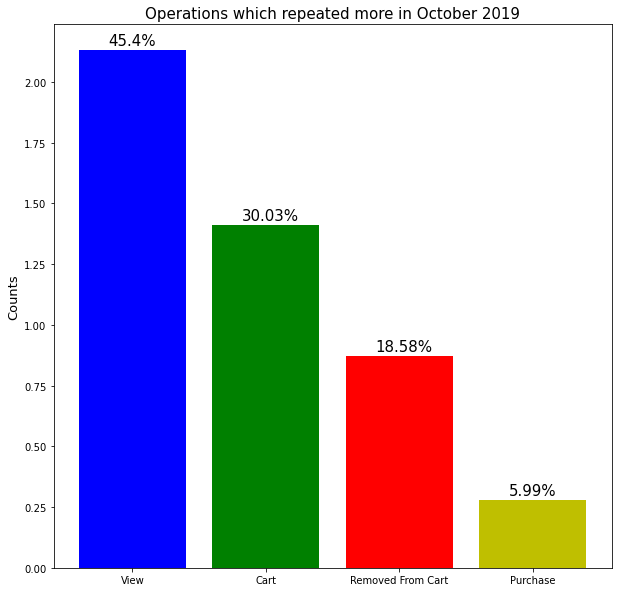

In [31]:
#Extracting the average number of times users perform each operation within a session

view_per_session_oct = sum(df_Oct[df_Oct["event_type"] == "view"].groupby("user_session").event_type.count()) / df_Oct['user_session'].nunique()
cart_per_session_oct =sum(df_Oct[df_Oct["event_type"] == "cart"].groupby("user_session").event_type.count()) / df_Oct['user_session'].nunique()
purchase_per_session_oct = sum(df_Oct[df_Oct["event_type"] == "purchase"].groupby("user_session").event_type.count()) / df_Oct['user_session'].nunique()
removed_from_cart_per_session_oct = sum(df_Oct[df_Oct["event_type"] == "remove_from_cart"].groupby("user_session").event_type.count()) / df_Oct['user_session'].nunique()

#Creating the list of average operations
average_operations_per_session_oct = [view_per_session_oct, cart_per_session_oct, removed_from_cart_per_session_oct, purchase_per_session_oct]


#Setting colors and labels
my_colors = ["b", "g", "r", "y"]
my_labels = ["View", "Cart", "Removed From Cart", "Purchase"]


#Ploting
fig, ax = plt.subplots(figsize = (10, 10))

ax.bar(my_labels , average_operations_per_session_oct, color = my_colors)
ax.set_title("Operations which repeated more in October 2019", fontsize = 15)
ax.set_ylabel("Counts", fontsize = 13)

#Initiating a empty list to annotate percentages
totals = []

#Finding the values and append to total
for i in ax.patches:
    totals.append(i.get_height())

#Creating the total
total = sum(totals)

#Using for loop for annotating each bar with their respected percentage
for i in ax.patches:
    #Fixing the location of the text above each bar
    ax.text(i.get_x()+.22, i.get_height()+0.02, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='black')

plt.show();

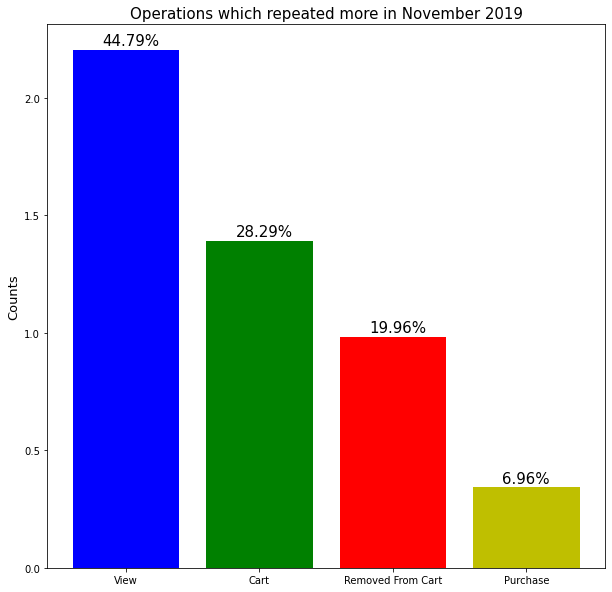

In [30]:
#Extracting the average number of times users perform each operation within a session

view_per_session_nov = sum(df_Nov[df_Nov["event_type"] == "view"].groupby("user_session").event_type.count()) / df_Nov['user_session'].nunique()
cart_per_session_nov =sum(df_Nov[df_Nov["event_type"] == "cart"].groupby("user_session").event_type.count()) / df_Nov['user_session'].nunique()
purchase_per_session_nov = sum(df_Nov[df_Nov["event_type"] == "purchase"].groupby("user_session").event_type.count()) / df_Nov['user_session'].nunique()
removed_from_cart_per_session_nov = sum(df_Nov[df_Nov["event_type"] == "remove_from_cart"].groupby("user_session").event_type.count()) / df_Nov['user_session'].nunique()

#Creating the list of average operations
average_operations_per_session_nov = [view_per_session_nov, cart_per_session_nov, removed_from_cart_per_session_nov, purchase_per_session_nov]


#Setting colors and labels
my_colors = ["b", "g", "r", "y"]
my_labels = ["View", "Cart", "Removed From Cart", "Purchase"]


#Ploting
fig, ax = plt.subplots(figsize = (10, 10))

ax.bar(my_labels , average_operations_per_session_nov, color = my_colors)
ax.set_title("Operations which repeated more in November 2019", fontsize = 15)
ax.set_ylabel("Counts", fontsize = 13)

#Initiating a empty list to annotate percentages
totals = []

#Finding the values and append to total
for i in ax.patches:
    totals.append(i.get_height())

#Creating the total
total = sum(totals)

#Using for loop for annotating each bar with their respected percentage
for i in ax.patches:
    #Fixing the location of the text above each bar
    ax.text(i.get_x()+.22, i.get_height()+0.02, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='black')

plt.show();

-------------------

* How many times, on average, a user views a product before adding it to the cart?

In [17]:
result = df_Oct[df_Oct.event_type == "view"].groupby(["user_id", "event_type"]).event_type.count().mean()
print("In October 2019, each user on average views a product " + str(round(result, 2)) + " times before adding it to the cart", end= "\n\n")

result = df_Nov[df_Nov.event_type == "view"].groupby(["user_id", "event_type"]).event_type.count().mean()
print("In November 2019, each user on average views a product " + str(round(result, 2)) + " times before adding it to the cart")

In October 2019, each user on average views a product 4.8 times before adding it to the cart

In November 2019, each user on average views a product 5.84 times before adding it to the cart


--------------------

* What’s the probability that products added once to the cart are effectively bought?

In [18]:
#Total products that added to the cart
total_cart = sum(df_Oct[df_Oct.event_type == "cart"].groupby("product_id").event_type.count())

#Total product that has been purchased
total_purchased = sum(df_Oct[df_Oct.event_type == "purchase"].groupby("product_id").event_type.count())

print("The probability that products added once to the cart in October 2019 are effectively bought is " + str(round(total_purchased / total_cart*100, 2)) + "%", end="\n\n")


#Total products that added to the cart
total_cart = sum(df_Nov[df_Nov.event_type == "cart"].groupby("product_id").event_type.count())

#Total product that has been purchased
total_purchased = sum(df_Nov[df_Nov.event_type == "purchase"].groupby("product_id").event_type.count())

print("The probability that products added once to the cart in November 2019 are effectively bought is " + str(round(total_purchased / total_cart*100, 2)) + "%")

The probability that products added once to the cart in October 2019 are effectively bought is 19.93%

The probability that products added once to the cart in November 2019 are effectively bought is 24.58%


---------------

* What’s the average time an item stays in the cart before being removed?

------------

* How much time passes on average between the first view time and a purchase/addition to cart?

--------

## [RQ2]
*What are the categories of the most trending products overall?* For each month visualize this information through a plot showing the number of sold products per category.
   - Plot the most visited subcategories.
   - What are the 10 most sold products per category?

C:\Users\engme\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator


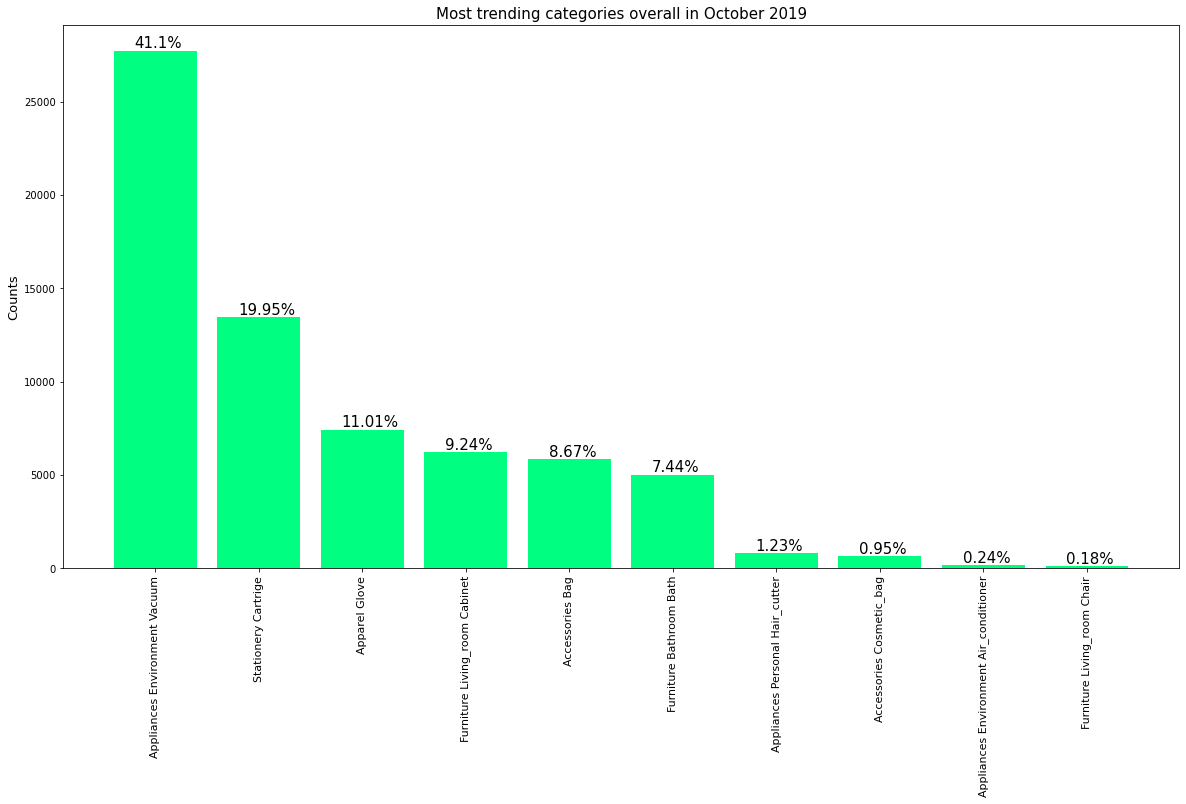

In [29]:
import re

top_category_n = 10

top_category = df_Oct.loc[:,'category_code'].value_counts()[:top_category_n].sort_values(ascending=False)


#Setting colors
my_colors = ['Qualitative']

#Creating my custom labels
my_labels = []

for label in list(top_category.index):
    label = re.findall(r"[\w']+", label)
    new = []
    for i in label:
        new.append(i.capitalize())
    newly = " ".join(new)
    my_labels.append(newly)


#Ploting
fig, ax = plt.subplots(figsize = (20, 10))
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.winter_r(np.linspace(0,1,10)))
ax.bar(my_labels , top_category)
#ax.set_color_cycle(['red', 'black', 'yellow'])
ax.set_title("Most trending categories overall in October 2019", fontsize = 15)
ax.set_ylabel("Counts", fontsize = 13)
ax.set_xticklabels(my_labels, rotation=90, fontsize = 11)

#Initiating a empty list to annotate percentages
totals = []

#Finding the values and append to total
for i in ax.patches:
    totals.append(i.get_height())

#Creating the total
total = sum(totals)

#Using for loop for annotating each bar with their respected percentage
for i in ax.patches:
    #Fixing the location of the text above each bar
    ax.text(i.get_x()+.2, i.get_height()+150, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='black')

plt.show();

C:\Users\engme\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator


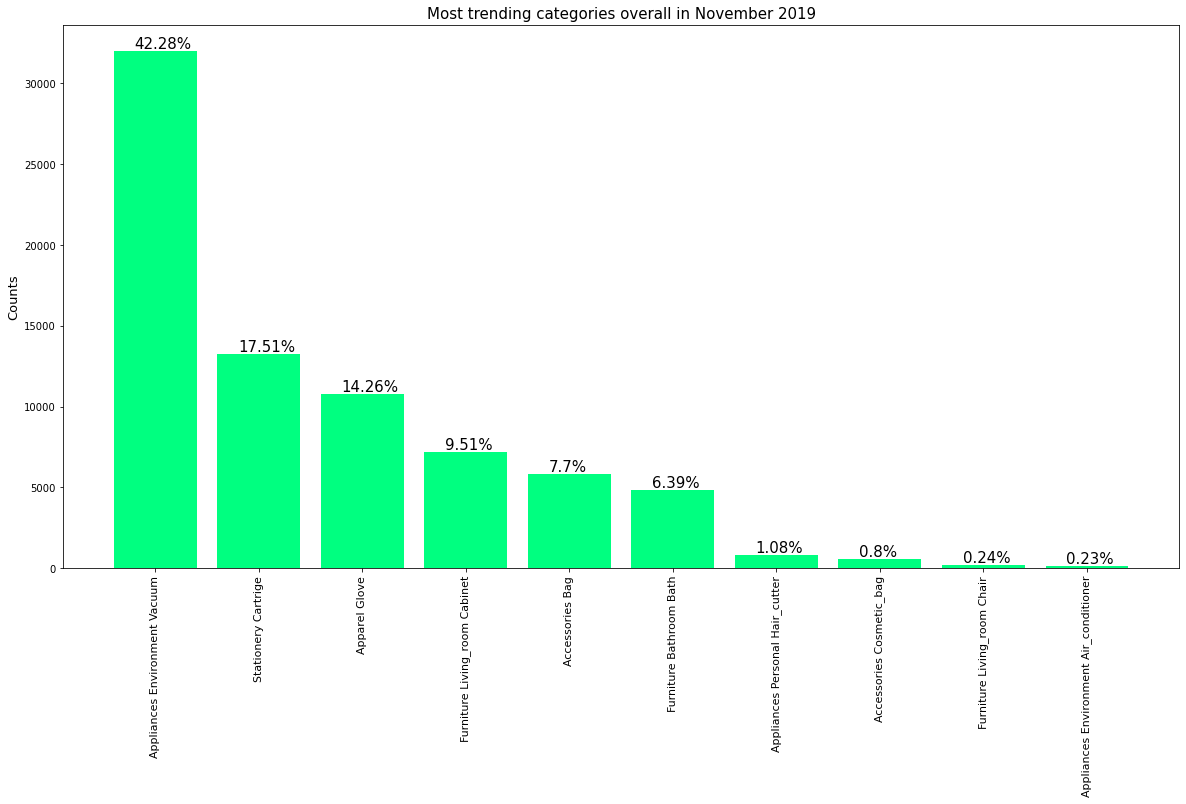

In [32]:
import re

top_category_n = 10

top_category = df_Nov.loc[:,'category_code'].value_counts()[:top_category_n].sort_values(ascending=False)


#Setting colors
my_colors = ['Qualitative']

#Creating my custom labels
my_labels = []

for label in list(top_category.index):
    label = re.findall(r"[\w']+", label)
    new = []
    for i in label:
        new.append(i.capitalize())
    newly = " ".join(new)
    my_labels.append(newly)


#Ploting
fig, ax = plt.subplots(figsize = (20, 10))
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.winter_r(np.linspace(0,1,10)))
ax.bar(my_labels , top_category)
#ax.set_color_cycle(['red', 'black', 'yellow'])
ax.set_title("Most trending categories overall in November 2019", fontsize = 15)
ax.set_ylabel("Counts", fontsize = 13)
ax.set_xticklabels(my_labels, rotation=90, fontsize = 11)

#Initiating a empty list to annotate percentages
totals = []

#Finding the values and append to total
for i in ax.patches:
    totals.append(i.get_height())

#Creating the total
total = sum(totals)

#Using for loop for annotating each bar with their respected percentage
for i in ax.patches:
    #Fixing the location of the text above each bar
    ax.text(i.get_x()+.2, i.get_height()+150, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='black')

plt.show();

## [RQ4]
* How much does each brand earn per month? Write a function that given the name of a brand in input returns, for each month, its profit. Is the average price of products of different brands significantly different?


   - Using the function you just created, find the top 3 brands that have suffered the biggest losses in earnings between one month and the next, specifing bothe the loss percentage and the 2 months (e.g., brand_1 lost 20% between march and april).

In [ ]:
def monthy_return_oct(brand, top_n = 3):
    
    oct_return = only_purchases_oct.groupby(['brand']).price.count().loc[[brand]].sum()
    nov_return = only_purchases_nov.groupby(['brand']).price.count().loc[[brand]].sum()
    
    profitAndLoss = pd.DataFrame()
    
    profitAndLoss['October'] = only_purchases_oct.groupby(['brand']).price.sum()
    profitAndLoss['November'] =  only_purchases_nov.groupby(['brand']).price.sum()

    profitAndLoss['profit_loss_nov'] = round(((profitAndLoss['November'] - profitAndLoss['October']) / profitAndLoss['October']) * 100, 2)

    profitAndLoss = profitAndLoss.sort_values(by = ["profit_loss_nov"])

    
    purchase_ranking_oct = only_purchases_oct.groupby(['brand']).price.sum().sort_values(ascending = False).to_frame().reset_index()
    brand_rank_oct = purchase_ranking_oct.loc[purchase_ranking_oct["brand"] == brand].index.values.sum() + 1
    
    purchase_ranking_nov = only_purchases_nov.groupby(['brand']).price.sum().sort_values(ascending = False).to_frame().reset_index()
    brand_rank_nov = purchase_ranking_nov.loc[purchase_ranking_nov["brand"] == brand].index.values.sum() + 1
    
    
    
    print(brand.capitalize() + " made " + str(oct_return) + "$ in October 2019" + " and its rank in sales is: " + str(brand_rank_oct))
    print(brand.capitalize() + " made " + str(nov_return) + "$ in November 2019" + " and its rank in sales is: " + str(brand_rank_nov), end= "\n\n")
    
    top_n_loss = profitAndLoss[:top_n]

    for i in top_n_loss.index:

        print(i.capitalize() + " lost " + str(top_n_loss["profit_loss_nov"][i]) + "% between October and November")
